In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook

# Q1
## (i) $f(x, y)=x^2+y^2$

$\begin{gather}
\nabla^2f(x, y) = \frac{\partial^2 (x^2+y^2)}{\partial x^2} + \frac{\partial^2 (x^2+y^2)}{\partial y^2} = 2 + 2 = 4\\
\boxed{\nabla^2f(x, y) \ne 0}
\end{gather}$

This function doesn't satisfy Laplace equation.

## (ii) $f(x, y)=x^2-y^2$

$\begin{gather}
\nabla^2f(x, y) = \frac{\partial^2 (x^2-y^2)}{\partial x^2} + \frac{\partial^2 (x^2-y^2)}{\partial y^2} = 2 - 2 \\
\boxed{\nabla^2f(x, y) = 0}
\end{gather}$

This function does satisfy Laplace quation.

The following implementaion for f1() and f2() are:
* $f_1(x, y)$ = $x^2+y^2$
* $f_2(x, y)$ = $x^2-y^2$

In [2]:
def f1(x, y):
    return np.power(x, 2) + np.power(y, 2)

def f2(x, y):
    return np.power(x, 2) - np.power(y, 2)

For the visual analysis the intervals x$\in$[-10, 10] $\&$ y$\in$[-10, 10] are taken with each interval having 100 discrete points. 

In [3]:
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)

X, Y = np.meshgrid(x, y)
Z1 = f1(X, Y)
Z2 = f2(X, Y)

## 3D-Plot of $x^2+y^2$
We can see that function atains minima in between boundary conditions and maxima at boundary.

<IPython.core.display.Javascript object>


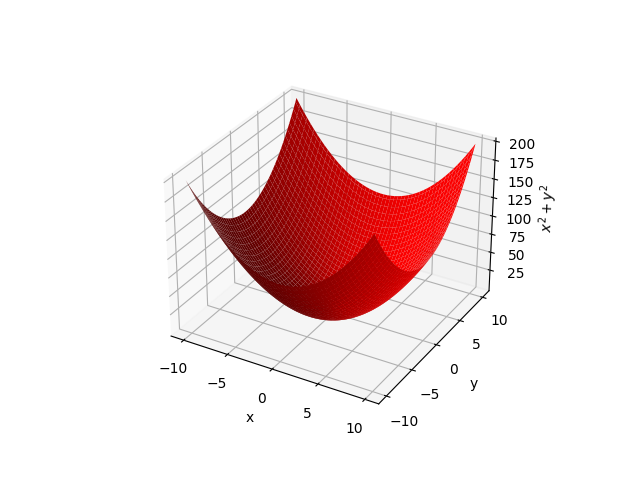

Text(0.5, 0, '$x^2+y^2$')

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z1, color='red')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('$x^2+y^2$')

## 3D-Plot of $x^2-y^2$
It is clearly visible in the plot that both global maxima and global minima is obtained at boundaries only.
Tangent or Gradient $\vec{\nabla} (x^2-y^2) = 2x\hat{x} - 2y\hat{y}$.

At local maima or minima,


$\vec{\nabla}f = \vec{0} \& \nabla^2f > 0(Minima), <0(Maxima)$

So for our function's gradient will be zero vector only at (0, 0) and its secound derivative is zero.
$\implies$No minima or maxima for $x^2-y^2$

<IPython.core.display.Javascript object>


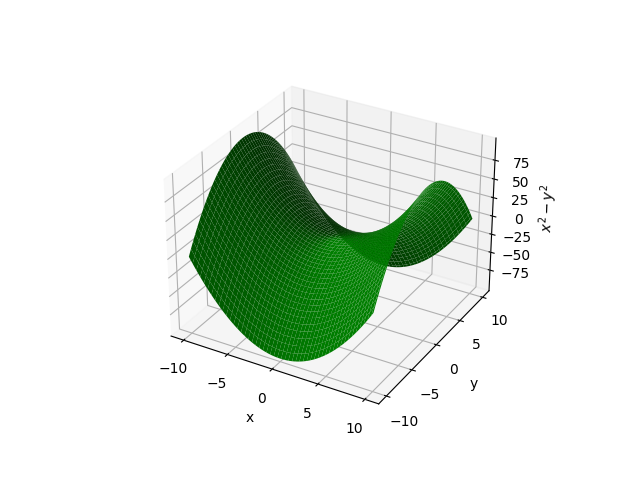

Text(0.5, 0, '$x^2-y^2$')

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z2, color='green')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('$x^2-y^2$')

# Q2
Given $V|_{\phi=0}=0$ and $V|_{\phi=45^o}=V_0$
## (a)
This wedged capacitor problem can be solved in cyclindrical coordinate system with no complexity rather than cartesian coordinate system.
Observe that we there is charge in the given sapce and boundary conditions are given.This means we can use Laplace equation for finding potential.

$\begin{gather}
\nabla^2 V = 0\\
\frac{\partial^2 V}{\partial r^2} + \frac{\partial^2 V}{\partial \phi^2} + \frac{\partial^2 V}{\partial z^2} = 0
\end{gather}$

Given no dependency on z and see that even V is independent on r because ant any radius boundary conditions are same so as the solution.

$\begin{gather}
\frac{\partial^2 V}{\partial \phi^2} = 0\\
\implies \text{Possible solution is } V = A\phi + B\\
\text{Applying boundary conditions } V|_{\phi=0}= (A\phi + B)|_{\phi=0} = 0 \implies B = 0\\
V|_{\phi=45^o}= (A\phi + B)|_{\phi=45^o} = V_0 \implies A = 4V_0/\pi\\
\implies \boxed{V = \frac{4V_0}{\pi}\phi}
\end{gather}$

## (b)
$\begin{gather}
\vec{E} = -\vec{\nabla}.V\\
\vec{E} = \frac{-1}{r}\left(\frac{\partial rV_r}{\partial r}\hat{r} + \frac{\partial V_\phi}{\partial \phi}\hat{\phi} + \frac{\partial rV_z}{\partial z}\hat{z}\right)\\
\implies \boxed{\vec{E} = \frac{-4V_0}{r\pi}\hat{\phi}}
\end{gather}$

Applying Gauss law on conductor at $\phi=0$.

$\begin{gather}
{E_{above}} - {E_{below}} = \frac{\sigma}{\epsilon_o}
\implies \frac{-4V_0}{r\pi} = \frac{\sigma}{\epsilon_o} \implies \boxed{\sigma = \frac{-4\epsilon_oV_0}{r\pi}}
\end{gather}$


# Q3
The discretisation of the wedged capacitor problem is done as following.

$\mathbf{V}=\begin{bmatrix}
0 & 0 & 0 & \textbf{0} & \textbf{1} & 0 & 0 & 0\\
0 & 0 & \textbf{0} & u_{13} & u_{14} & \textbf{1} & 0 & 0\\
0 & \textbf{0} & u_{22} & u_{23} & u_{24} & u_{25} & \textbf{1} & 0\\
\textbf{0} & u_{31} & u_{32} & u_{33} & u_{34} & u_{35} & u_{36} & \textbf{1}
\end{bmatrix}$

So this shape is (4, 8) or generic shape of matrix is (N, 2N). Since the Laplace equation is dependent only on one variable, So $V(i, j) = \frac{V(i, j-1) + V(i, j+1)}{2}$ will satisfy the laplace equation.

So we do the iteration by shifting and adding matrices

V[1:#rows] = 0.5*(V[1:#rows, 0:#cols-2] + V[1:#rows, 2:#cols])

Doing this would affect the boundary points on the matrix so we update the matrix every time we apply the above transformation and this is achieved by function re_init(V).
Here the metric is Root mean square error 
RMSE=sqrt(sum((V^' - V)^2)).

Please observe the Error vs #itr which tells how many iterations required for (10, 20) matrix.

The number of iterations required for the matrix of size (10,20) getting error below 1e-05 is 601


<IPython.core.display.Javascript object>


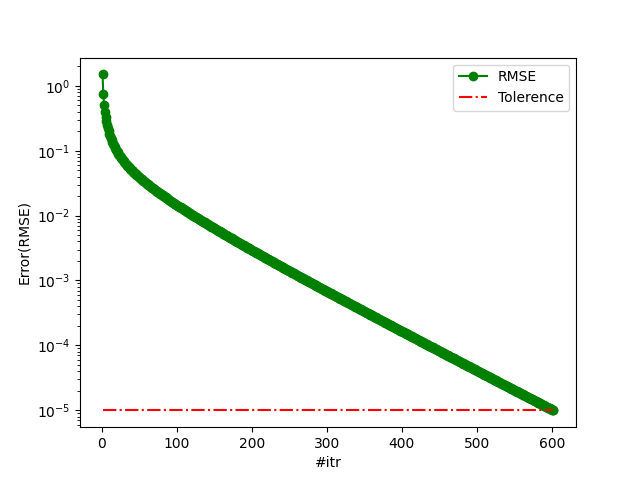

In [6]:
N = 10
itr = 2000
tolerence = 1e-5

x = 0
rows = N
cols = 2*N + x

V = np.zeros((rows, cols))

def re_intit(V, N):
    for i in range(N):
        V[i, :N-i] = 0
        V[i, N+i+x] = 1
        V[i, N+i+x+1:] = 0

re_intit(V, N)

V_prev = V.copy()
err = []
for i in range(itr):
    V[1:rows, 1:cols-1] = 0.5*(V[1:rows, 0:cols-2] + V[1:rows, 2:cols])
    re_intit(V, N)
    err_dif = V - V_prev
    err_i = np.sqrt(np.sum((err_dif**2)))
    err.append(err_i)
    if err_i <= tolerence:
        break
    V_prev = V.copy()

err = np.array(err)

print('The number of iterations required for the matrix of size ('+str(rows)+','+str(cols)+
      ') getting error below ' + str(tolerence) + ' is ' + str(i))
plt.semilogy(np.arange(len(err))+1, err, '-og', label='RMSE')
plt.semilogy(np.arange(len(err))+1, np.ones(len(err))*tolerence, '-.r', label='Tolerence')
plt.xlabel('#itr')
plt.ylabel('Error(RMSE)')
plt.legend()
plt.show()

The below code is for plotting the 3D results.
You can observe inclined planes which are wedges and the yellow plot is the potential between the plates.
## When $\phi=22.5^o$, Potential is $\frac{V_0}{2}$
The black line is the potential along the line $\phi=22.5^o$.

<IPython.core.display.Javascript object>


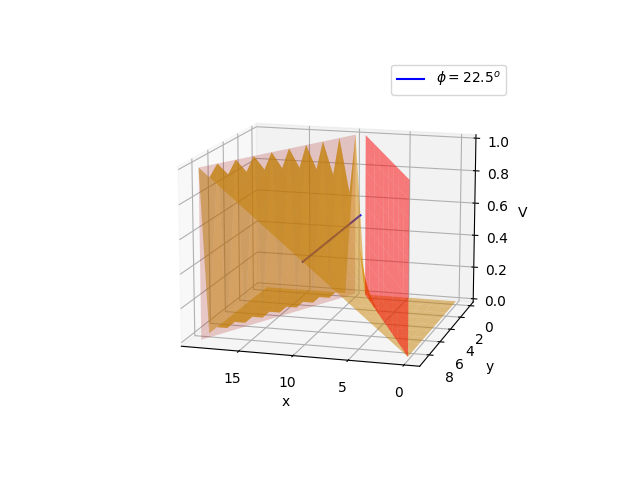

In [7]:
x = np.arange(cols)
y = np.arange(rows)

xwed = np.linspace(0, rows-1, rows)
zwed = np.linspace(0, 1, rows)

X, Y = np.meshgrid(x, y)

Xwed, Zwed = np.meshgrid(xwed, zwed)

Ylwed = N-1 - Xwed
Yuwed =  Xwed + N
Xmid = (N - 0.5)*np.ones(rows)
zmid = 0.5*np.ones(rows)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, V, color='orange', alpha=0.5)
ax.plot_surface(Xwed, Ylwed, Zwed, color='red', alpha=0.5)
ax.plot_surface(Yuwed, Xwed, Zwed, color='red', alpha=0.2)
ax.plot(Xmid, y, zmid, color='blue', label='$\phi=22.5^o$')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('V')
ax.legend()
plt.show()

<IPython.core.display.Javascript object>


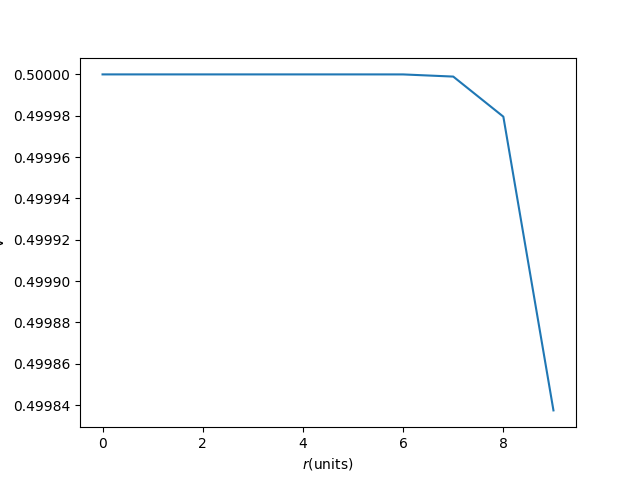

In [8]:
plt.plot((V[:,N-1]+V[:,N])/2)
plt.xlabel('$r$(units)')
plt.ylabel('V')
plt.show()

# Q4
$\begin{gather}
f(x) = 4x^4 + x^2 - x + 3\\
\boxed{f^{''}(x) = 48x^2 + 2}
\end{gather}$

## Forward approximation
$f^{''}(x) = \frac{f(x+2h) -2f(x+h) + f(x)}{h^2}$
## Central approximation
$f^{''}(x) = \frac{f(x+h) -2f(x) + f(x-h)}{2h^2}$

## Error = $\frac{F^{''}(x) - f^{''}(x)}{f^{''}(x)}$

In [9]:
def f(x):
    return 4*np.power(x, 4) + np.power(x, 2) - x +3

def fxx(x): #f''(x)
    return 48*np.power(x, 2) + 2

You can alter x and h for obtaining results at different locations. 

In [10]:
x = 10
h = 0.1
N = 10

H = h*np.array([2**(-1*i) for i in range(N)], dtype=np.float64)

Fxx_c = (f(x+H) - 2*f(x) + f(x-H))/(np.power(H, 2))
Fxx_f = (f(x+2*H) - 2*f(x+H) + f(x))/np.power(H, 2)

err_c = np.absolute(Fxx_c-fxx(x))/fxx(x)
err_f = np.absolute(Fxx_f-fxx(x))/fxx(x)

The below code is for plotting the obtained results

<IPython.core.display.Javascript object>


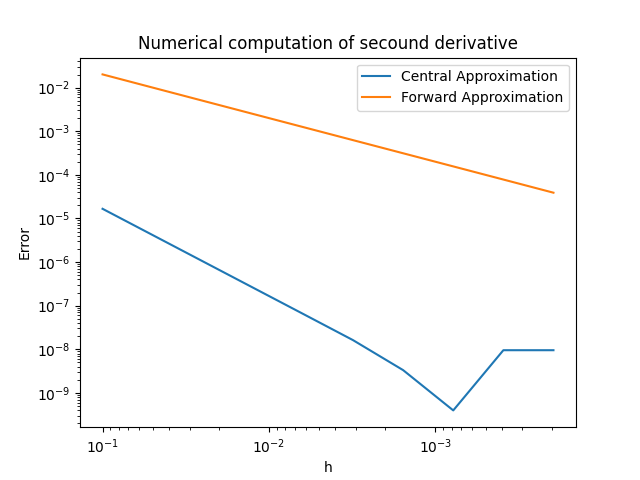

In [11]:
plt.figure()
plt.title('Numerical computation of secound derivative')
plt.loglog(H, err_c, label='Central Approximation')
plt.loglog(H, err_f, label='Forward Approximation')
plt.xlabel('h')
plt.ylabel("Error")
plt.gca().invert_xaxis()
plt.legend()
plt.show()